<a href="https://colab.research.google.com/github/MaiTrang03/ProjectII/blob/main/update_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [ ]:
import pandas as pd
df = pd.read_csv("loan.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()
#returns total number of null values in each column

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

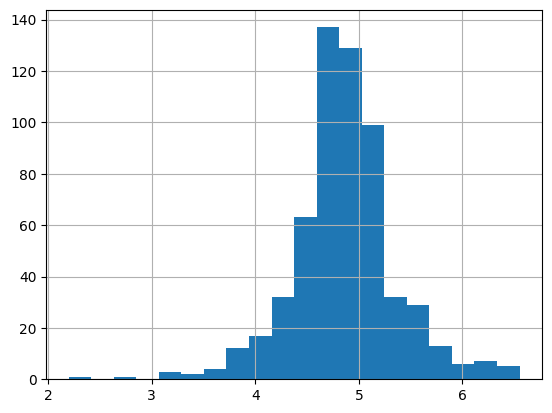

In [ ]:
df['loanAmount_log']=np.log(df['LoanAmount'])
#calculates natural log of every element of the given array
df['loanAmount_log'].hist(bins=20)
#creates a histogram
# Bins are the buckets that your histogram will be grouped by. On the back end, Pandas will group your data into bins, or buckets. Then pandas will count how many values fell into that bucket, and plot the result.

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

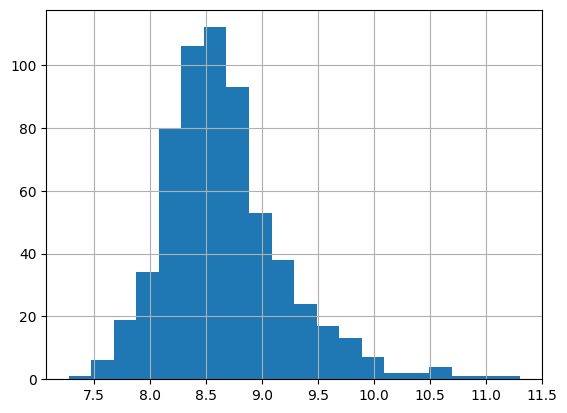

In [ ]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome']= np.log(df['TotalIncome'])
df['TotalIncome'].hist(bins=20)

In [ ]:
#FILLING of the NULL VALUES in all the Respective columns

df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df['Married'].fillna(df['Married'].mode()[0],inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log=df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

df.isnull().sum()

<ipython-input-13-c0c1f2692249>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
<ipython-input-13-c0c1f2692249>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
#SELECTING OF SOME ROWS AND COLIMNS FOR TRAINING AND TESTING

x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values


#The iloc function from pandas module hepls us to select a specific row or column from the dataset.
#Using iloc function we can easily retrieve a particular value from a row or column by using index values.


In [ ]:
#Calculating Percentage of Missing Genders form Dataset

print("Percent of Missing Gender is  : %2f %%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

Percent of Missing Gender is  : 0.000000 %


Number of People who take loan as a group by Gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<ipython-input-16-473905be3973>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette ='Set2')


<Axes: xlabel='Gender', ylabel='count'>

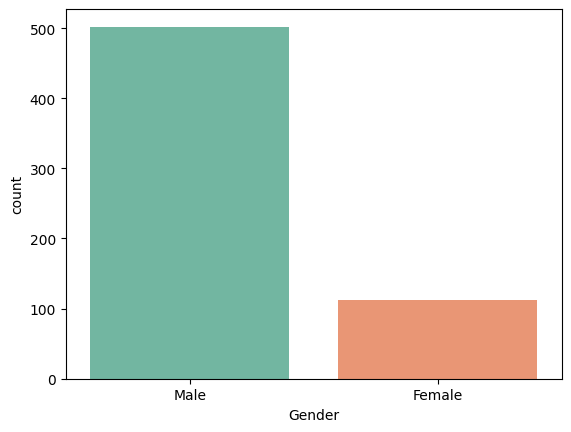

In [ ]:
#Calculating Number of People who take loan as a group by Gender

print("Number of People who take loan as a group by Gender")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette ='Set2')

Number of People who take loan as a group by Marital Status
Married
Yes    401
No     213
Name: count, dtype: int64


<ipython-input-17-a4a628c89e91>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=df, palette ='Set3')


<Axes: xlabel='Married', ylabel='count'>

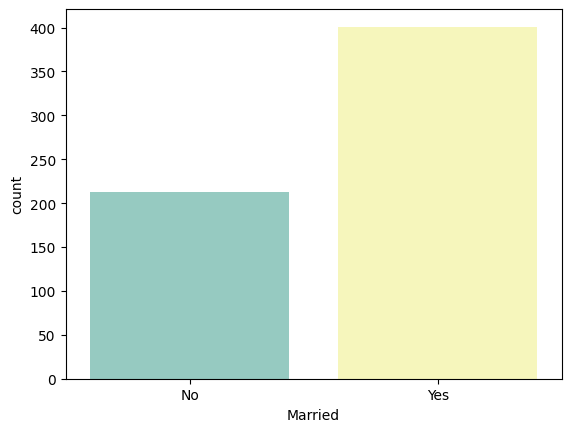

In [ ]:
#Calculating Number of People who take loan as a group by Marital Status

print("Number of People who take loan as a group by Marital Status")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette ='Set3')

Number of People who take loan as a group by Dependents
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<ipython-input-18-208c8583e0f8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents', data=df, palette ='Set2',legend=False)


<Axes: xlabel='Dependents', ylabel='count'>

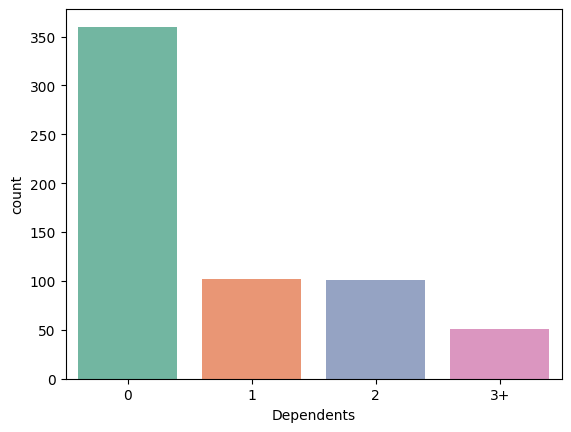

In [ ]:
#Calculating Number of People who take loan as a group by Dependents

print("Number of People who take loan as a group by Dependents")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, palette ='Set2',legend=False)

Number of People who take loan as a group by Self Employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<ipython-input-19-88f2a1bf7b8f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=df, palette ='Set2',legend=False)


<Axes: xlabel='Self_Employed', ylabel='count'>

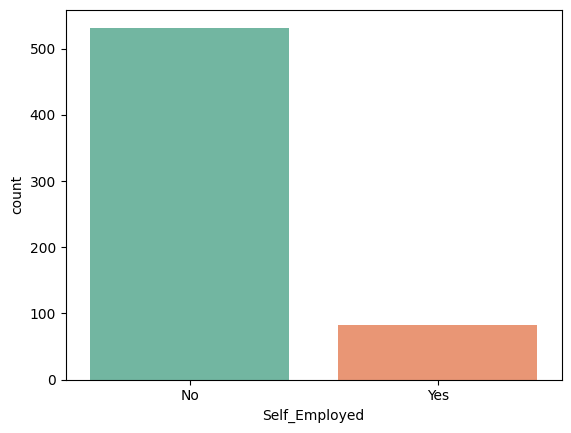

In [ ]:
#Calculating Number of People who take loan as a group by Self Employed

print("Number of People who take loan as a group by Self Employed")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df, palette ='Set2',legend=False)

Number of People who take loan as a group by Loan Amount
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
187.000000    12
              ..
292.000000     1
142.000000     1
350.000000     1
496.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<ipython-input-20-65786b5905ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount', data=df, palette ='Set2',legend=False)


<Axes: xlabel='LoanAmount', ylabel='count'>

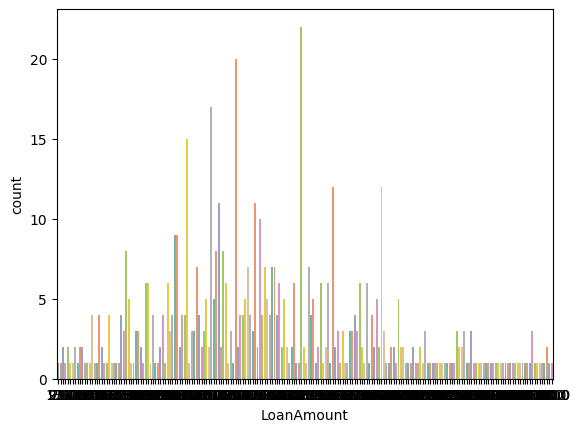

In [ ]:
#Calculating Number of People who take loan as a group by Loan Amount

print("Number of People who take loan as a group by Loan Amount")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=df, palette ='Set2',legend=False)

Number of People who take loan as a group by Credit History
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<ipython-input-21-07bb5dbd54c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=df, palette ='Set2',legend=False)


<Axes: xlabel='Credit_History', ylabel='count'>

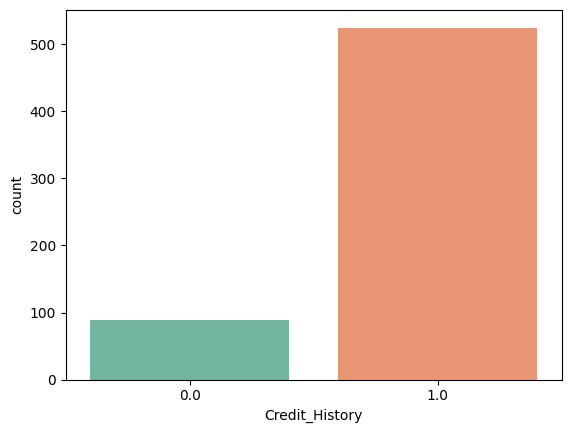

In [ ]:
#Calculating Number of People who take loan as a group by Credit History

print("Number of People who take loan as a group by Credit History")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette ='Set2',legend=False)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()

#train_test_split function of sklearn model selection package in python splits arrays or matrices into random subsets for train and test data

#LabelEncoder encode label with a value between o and n-1 classes, where n is the number of distinct label

In [ ]:
for i in range(0,5):
    x_train[:,i]=labelencoder_x.fit_transform(x_train[:,i])
    x_train[:,7]=labelencoder_x.fit_transform(x_train[:,7])

x_train

#fit_transform joins this two steps and is used for the initial fitting of the parameter on the training set while
#also returning the transform X internally the transfer object just calls first fit and then transforms on the same data.

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [ ]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
for i in range(0,5):
    x_test[:,i]=labelencoder_x.fit_transform(x_test[:,i])
    x_test[:,7]=labelencoder_x.fit_transform(x_test[:,7])

x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [ ]:
y_test=labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

#StandardScaler removes the mean and scales the each feature variable to unit variance.This Operation performed feature-wise in an independent way.

In [ ]:
#Lets see which classifier is best for prediction by comparing their accuracy.

from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

#A random forest Classifier is a meta estimator that employs averaging to increase prediction accuracy and reduce overfitting.

#If Boost = true , the size of the sub sample is determined by the max sample Argument otherwise each tree is constructed using the entire dataset.

RandomForestClassifier()

In [ ]:
from sklearn import metrics

y_pred=rf_clf.predict(x_test)
y_pred_rf = rf_clf.predict(x_test)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
precision_rf = metrics.precision_score(y_test, y_pred_rf)
recall_rf = metrics.recall_score(y_test, y_pred_rf)
f1_score_rf = metrics.f1_score(y_test, y_pred_rf)

print("acc of random forest clf is : ",metrics.accuracy_score(y_pred,y_test))
print("Random Forest:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_score_rf)

y_pred

# 1-loan_approved
# 0-loan_rejected

acc of random forest clf is :  0.7804878048780488
Random Forest:
Precision: 0.8247422680412371
Recall: 0.8888888888888888
F1-score: 0.8556149732620321


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_clf=GaussianNB()
nb_clf.fit(x_train,y_train)

#Naive_bayes is a classfication algorithm for binary two classes and multi classes classification problem it is called "naive" because the calculation of probabilities
# for each class are simplified to make that calculation tractable.

GaussianNB()

In [ ]:
y_pred=nb_clf.predict(x_test)
precision_rf = metrics.precision_score(y_test, y_pred_rf)
recall_rf = metrics.recall_score(y_test, y_pred_rf)
f1_score_rf = metrics.f1_score(y_test, y_pred_rf)

print("acc of naive_bayes clf is : ",metrics.accuracy_score(y_pred,y_test))
print("Naive Bayes:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_score_rf)
y_pred

# 1-loan_approved
# 0-loan_rejected

acc of naive_bayes clf is :  0.8292682926829268
Naive Bayes:
Precision: 0.8247422680412371
Recall: 0.8888888888888888
F1-score: 0.8556149732620321


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

#Decsion Tree Clf is the non-parametric supervised learning approach used for classification and regression application. It is organized heirarichally as
# no root branches, internal nodes and leaf nodes.

DecisionTreeClassifier()

In [ ]:
y_pred=dt_clf.predict(x_test)
y_pred_dt = y_pred  # Assign the predictions to y_pred_dt
accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
precision_dt = metrics.precision_score(y_test, y_pred_dt)
recall_dt = metrics.recall_score(y_test, y_pred_dt)
f1_score_dt = metrics.f1_score(y_test, y_pred_dt)
print("acc of decision tree clf is : ",metrics.accuracy_score(y_pred,y_test))
y_pred
print("\nDecision Tree:")
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_score_dt)
# 1-loan_approved
# 0-loan_rejected

acc of decision tree clf is :  0.7317073170731707

Decision Tree:
Precision: 0.8701298701298701
Recall: 0.7444444444444445
F1-score: 0.8023952095808383


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(x_train,y_train)

#In K neighbors, the five closest neighbors are sought for the k neighbors classifier. The classifier must be explicitly instructed to utilize
# Euclidean descent to determine the proximity of nearby points.

KNeighborsClassifier()

In [ ]:
y_pred=kn_clf.predict(x_test)
y_pred_kn = y_pred  # Assign the predictions to y_pred_kn
accuracy_kn = metrics.accuracy_score(y_test, y_pred_kn)
precision_kn = metrics.precision_score(y_test, y_pred_kn)
recall_kn = metrics.recall_score(y_test, y_pred_kn)
f1_score_kn = metrics.f1_score(y_test, y_pred_kn)

print("\nK Neighbors:")
print("Accuracy:", accuracy_kn)
print("Precision:", precision_kn)
print("Recall:", recall_kn)
print("F1-score:", f1_score_kn)
print("acc of K Neighbors clf is : ",metrics.accuracy_score(y_pred,y_test))
y_pred

# 1-loan_approved
# 0-loan_rejected


K Neighbors:
Accuracy: 0.7967479674796748
Precision: 0.8217821782178217
Recall: 0.9222222222222223
F1-score: 0.8691099476439791
acc of K Neighbors clf is :  0.7967479674796748


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

Hence Naive Bayes is used as it provides the best accuracy in prediction data.

In [ ]:
from sklearn import metrics

# ... (your existing code for training and prediction) ...

# Calculate and store metrics for Random Forest
y_pred_rf = rf_clf.predict(x_test)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
precision_rf = metrics.precision_score(y_test, y_pred_rf)
recall_rf = metrics.recall_score(y_test, y_pred_rf)
f1_score_rf = metrics.f1_score(y_test, y_pred_rf)

# Calculate and store metrics for Naive Bayes
y_pred_nb = nb_clf.predict(x_test)  # Get predictions for Naive Bayes
accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)  # Calculate accuracy
precision_nb = metrics.precision_score(y_test, y_pred_nb)  # Calculate precision
recall_nb = metrics.recall_score(y_test, y_pred_nb)  # Calculate recall
f1_score_nb = metrics.f1_score(y_test, y_pred_nb)  # Calculate F1-score


print("STT | Thuật toán | Accuracy | Precision | Recall | F1-score")
print("---|---|---|---|---|---")
print(f"1 | Random Forest | {accuracy_rf:.4f} | {precision_rf:.4f} | {recall_rf:.4f} | {f1_score_rf:.4f}")
print(f"2 | Naive Bayes | {accuracy_nb:.4f} | {precision_nb:.4f} | {recall_nb:.4f} | {f1_score_nb:.4f}")
print(f"3 | Decision Tree | {accuracy_dt:.4f} | {precision_dt:.4f} | {recall_dt:.4f} | {f1_score_dt:.4f}")
print(f"4 | K Neighbors | {accuracy_kn:.4f} | {precision_kn:.4f} | {recall_kn:.4f} | {f1_score_kn:.4f}")

STT | Thuật toán | Accuracy | Precision | Recall | F1-score
---|---|---|---|---|---
1 | Random Forest | 0.7805 | 0.8247 | 0.8889 | 0.8556
2 | Naive Bayes | 0.8293 | 0.8224 | 0.9778 | 0.8934
3 | Decision Tree | 0.7317 | 0.8701 | 0.7444 | 0.8024
4 | K Neighbors | 0.7967 | 0.8218 | 0.9222 | 0.8691


In [ ]:
y_pred=nb_clf.predict(x_test)
y_pred

# 1-loan_approved
# 0-loan_rejected

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
import pandas as pd
df = pd.read_csv("loan.csv")

In [ ]:
# 1. Get the indices of the test set from the train_test_split
# Instead of using df.index, use a range of numbers that corresponds to the length of y_test
test_indices = range(len(y_test))

# 2. Create a new DataFrame containing only the Loan_ID and corresponding Prediction
results_df = pd.DataFrame({'Loan_ID': loan_ids, 'Prediction': y_pred})

# 3. Map prediction values to 'Approved' and 'Rejected'
results_df['Prediction'] = results_df['Prediction'].map({1: 'Approved', 0: 'Rejected'})

# 4. Display the results
print(results_df)

      Loan_ID Prediction
0    LP001002   Approved
1    LP001003   Approved
2    LP001005   Approved
3    LP001006   Approved
4    LP001008   Approved
..        ...        ...
118  LP001421   Approved
119  LP001422   Approved
120  LP001426   Approved
121  LP001430   Rejected
122  LP001431   Approved

[123 rows x 2 columns]


In [ ]:
# 1. Get the indices of the test set from the train_test_split
test_indices = range(len(y_test))

# 2. Create a new DataFrame containing only the Loan_ID and corresponding Prediction
results_df = pd.DataFrame({'Loan_ID': loan_ids, 'Prediction': y_pred})

# 3. Map prediction values to 'Approved' and 'Rejected'
results_df['Prediction'] = results_df['Prediction'].map({1: 'Approved', 0: 'Rejected'})

# 4. Display all results using to_string()
print(results_df.to_string())  # Use to_string() to print all rows

      Loan_ID Prediction
0    LP001002   Approved
1    LP001003   Approved
2    LP001005   Approved
3    LP001006   Approved
4    LP001008   Approved
5    LP001011   Rejected
6    LP001013   Approved
7    LP001014   Approved
8    LP001018   Rejected
9    LP001020   Approved
10   LP001024   Approved
11   LP001027   Approved
12   LP001028   Approved
13   LP001029   Approved
14   LP001030   Approved
15   LP001032   Approved
16   LP001034   Approved
17   LP001036   Approved
18   LP001038   Approved
19   LP001041   Rejected
20   LP001043   Rejected
21   LP001046   Approved
22   LP001047   Approved
23   LP001050   Approved
24   LP001052   Approved
25   LP001066   Approved
26   LP001068   Approved
27   LP001073   Approved
28   LP001086   Rejected
29   LP001087   Rejected
30   LP001091   Approved
31   LP001095   Approved
32   LP001097   Approved
33   LP001098   Approved
34   LP001100   Approved
35   LP001106   Rejected
36   LP001109   Approved
37   LP001112   Approved
38   LP001114   Approved


In [ ]:
import pandas as pd

test_indices = range(len(y_test))
results_df = pd.DataFrame({'Loan_ID': loan_ids, 'Prediction': y_pred})
results_df['Prediction'] = results_df['Prediction'].map({1: 'Approved', 0: 'Rejected'})
def get_prediction(loan_id):
    try:
        prediction = results_df.loc[results_df['Loan_ID'] == loan_id, 'Prediction'].values[0]
        return prediction
    except IndexError:
        return "Loan ID not found in test data."
loan_id_input = input("Enter Loan ID: ")
prediction = get_prediction(loan_id_input)
print(f"Prediction for Loan ID {loan_id_input}: {prediction}")

Enter Loan ID: LP001194
Prediction for Loan ID LP001194: Approved
